In [380]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [381]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data = data.astype(np.float32)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.250000,69.059998,62.080002,31.799999,63.009998,28.299999,36.930000,43.230000,42.310001,67.370003,...,74.389999,41.299999,30.049999,39.529999,76.070000,28.620001,72.029999,24.020000,76.029999,27.500000
1,38.110001,69.980003,62.389999,31.740000,62.490002,28.230000,37.130001,42.849998,41.849998,68.410004,...,74.690002,41.700001,30.180000,38.930000,75.709999,28.469999,72.110001,24.040001,76.050003,27.540001
2,37.900002,69.559998,62.820000,31.570000,62.740002,28.600000,36.570000,42.990002,41.480000,69.839996,...,75.139999,41.139999,30.090000,38.169998,75.559998,28.480000,72.540001,23.760000,75.660004,27.549999
3,37.639999,69.389999,63.259998,31.559999,61.849998,28.670000,37.090000,43.230000,41.240002,70.360001,...,75.239998,41.380001,30.080000,38.240002,75.349998,28.590000,73.750000,23.969999,75.709999,27.740000
4,37.700001,69.709999,64.040001,31.420000,62.020000,28.420000,37.090000,42.900002,41.400002,69.120003,...,75.330002,41.689999,30.340000,37.849998,75.209999,28.549999,74.320000,24.010000,75.769997,27.540001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.200001,47.240002,47.099998,25.660000,41.450001,22.240000,23.719999,40.320000,15.130000,42.150002,...,98.389999,52.240002,19.639999,26.540001,78.010002,20.830000,78.470001,15.550000,67.349998,25.780001
1496,36.880001,46.910000,47.500000,26.070000,41.439999,22.100000,23.690001,40.090000,14.830000,41.799999,...,97.400002,52.939999,19.940001,26.299999,77.589996,20.980000,79.360001,15.520000,67.290001,26.049999
1497,36.990002,47.299999,47.669998,26.200001,41.680000,22.150000,23.520000,40.310001,14.670000,41.549999,...,96.919998,53.320000,19.920000,26.510000,77.839996,20.889999,78.669998,15.370000,67.010002,26.219999
1498,36.790001,47.230000,47.299999,25.730000,41.639999,22.129999,23.120001,40.570000,14.540000,42.310001,...,97.180000,54.099998,19.900000,26.549999,77.000000,20.790001,78.669998,15.450000,67.300003,26.440001


In [382]:
# Fit the linreg model
data_pct = data.sum(axis=1).pct_change().dropna()
X = []
y = []
for i in range(2, len(data_pct)):
    X.append([data_pct.iloc[i-1], data_pct.iloc[i-2]])
    y.append(data_pct.iloc[i])

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
model = LinearRegression()
# model = SVR(kernel='rbf', C=1.0, epsilon=0.1) # Worse than linear
model.fit(X_train, y_train)
# print(model.coef_, model.intercept_)

SVR()

In [385]:
# Test direction and magnitude
def acc_trade_metric(y_test, y_pred, threshold=0.0005):
    error = 0
    for i in range(len(y_test)):
        # if (abs(y_test[i]) < threshold and abs(y_pred[i]) > threshold) \
        #     or (abs(y_test[i]) > threshold and abs(y_pred[i]) < threshold):
        #     error += 1
        
        if y_test[i] * y_pred[i] < 0:
            error += 1
    return 1 - error / len(y_test)
        

In [386]:
X_test

[[-0.0023486614, -0.0029386878],
 [-0.002989769, -0.0013316274],
 [-0.0003489256, -0.000195086],
 [0.0018546581, 0.0006786585],
 [-0.0010635257, -0.0008350611],
 [0.00054359436, -0.0011206269],
 [-0.004309714, -0.0015443563],
 [-0.0018007755, -0.0012896657],
 [0.0007158518, -0.0021808743],
 [0.0020068884, 0.0005403757],
 [0.0022445917, 0.00052785873],
 [-8.380413e-05, -0.00042647123],
 [0.0032408237, 0.0011253357],
 [-0.00030755997, 0.00174582],
 [0.0015753508, -0.0018007755],
 [-0.00025820732, -0.0010315776],
 [-0.0030876994, 0.00047075748],
 [-0.0005956292, 0.0014249086],
 [7.605553e-05, 0.0032408237],
 [0.00040960312, 0.0002090931],
 [-0.0025023222, -0.0019497871],
 [0.00018894672, 0.00040960312],
 [0.00121665, 0.0020354986],
 [0.0016131401, 0.0014833212],
 [-0.0028746128, -0.0049854517],
 [0.0015543699, 0.0008685589],
 [0.0031502247, 0.0047694445],
 [-0.0014627576, -0.00010937452],
 [-0.0008278489, -0.001460731],
 [-0.0019997954, -0.0011100173],
 [0.00033211708, -0.001123786],
 [0.

In [387]:
y_test

[2.503395e-05,
 -0.002729416,
 -0.0012924075,
 0.00054466724,
 -0.0030623078,
 0.0002477169,
 -0.0021190047,
 0.0015753508,
 -0.0022550821,
 0.0045005083,
 -0.0021808743,
 0.00021135807,
 7.605553e-05,
 -8.928776e-05,
 0.0006763935,
 -0.000808537,
 -0.00082564354,
 -0.0015770197,
 0.0035820007,
 0.00018894672,
 -0.00065404177,
 0.0017268658,
 -0.00010061264,
 -0.0005900264,
 0.00034844875,
 0.00068092346,
 -0.00053083897,
 5.0902367e-05,
 -0.0008762479,
 -0.00023591518,
 -0.00081795454,
 -0.0006905794,
 0.0008547306,
 -0.00014984608,
 0.00029730797,
 0.0010312796,
 -0.00038188696,
 0.00036406517,
 -0.00027310848,
 -0.0009583831,
 0.0033153296,
 -0.0031272173,
 -0.0005701184,
 -0.00029408932,
 0.00078964233,
 0.0010088682,
 0.000790596,
 0.0013705492,
 0.00025498867,
 -0.00037300587,
 -0.002856195,
 0.0009430647,
 -0.00052142143,
 -0.00030702353,
 0.0005708933,
 -0.0013139844,
 -0.00084996223,
 0.0023192167,
 0.000543952,
 -0.001837492,
 0.0021755695,
 -0.00042277575,
 0.00042665005,
 0

In [388]:
# Base metrics
print(mean_squared_error(y_test, np.array(X_test)[:, 0]))
print(acc_trade_metric(y_test, np.array(X_test)[:, 0]))

3.9918355e-06
0.5933333333333333


In [389]:
print(mean_squared_error(y_test, model.predict(X_test)))
print(acc_trade_metric(y_test, model.predict(X_test)))

2.8296759365176173e-06
0.55


Correlation + comb digging

In [335]:
# Backward selection - to maximize correlation
def backward_selection(data_train: pd.Series):
    initial = set(range(50))
    seq = []
    length = []
    trimmeds = []
    while True:
        initial_corr = data_train[list(initial)].sum(axis=1).pct_change().dropna().autocorr(lag=1)
        best_corr = -1
        best_trimmed = None
        for j in initial:
            trimmed = initial - {j}
            corr = data_train[list(trimmed)].sum(axis=1).pct_change().dropna().autocorr(lag=1)
            if corr > best_corr:
                best_corr = corr
                best_trimmed = trimmed
        print(best_corr, best_trimmed)
        seq.append(best_corr)
        length.append(len(best_trimmed))
        trimmeds.append(best_trimmed)
        initial = best_trimmed
        if len(initial) == 1:
            break

    return seq, length, trimmeds



In [336]:
def test(data_test: pd.Series, chosen: set):
    data_test = data_test[list(chosen)].sum(axis=1).pct_change().dropna()
    return data_test.autocorr(lag=1)

0.4233652380636193 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.43104988756658974 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.436882565933382 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.44224612417434195 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.4467148894338279 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.

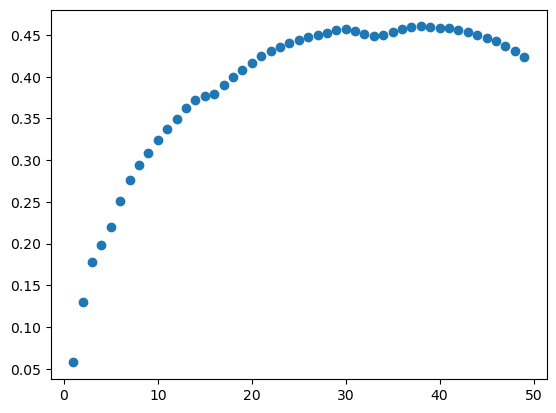

In [337]:
seq, length, trimmed = backward_selection(data.iloc[:1000])
plt.scatter(length, seq)

In [338]:
seq.index(max(seq))

11

In [339]:
test(data.iloc[1000:], trimmed[seq.index(max(seq))])

0.37621670686614306

In [340]:
print(list(trimmed[seq.index(max(seq))]))

[0, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49]


0.4233652380636193 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.43104988756658974 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.436882565933382 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.44224612417434195 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.4467148894338279 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.

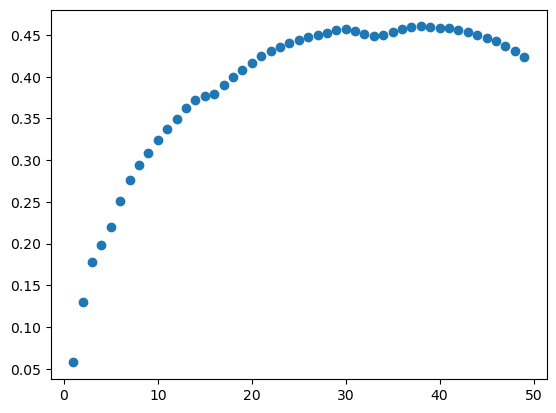

In [341]:
seq, length, trimmed = backward_selection(data.iloc[:1000])
print("Test:", test(data.iloc[1000:], trimmed[seq.index(max(seq))]))
print(list(trimmed[seq.index(max(seq))]))
plt.scatter(length, seq)

In [342]:
test(data.iloc[1000:], [i for i in range(50)])

0.341911955614931

0.42868607409505854 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.43540597530317465 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.44147368627898514 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.4456434633851328 {0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.44894697436688796 {0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 

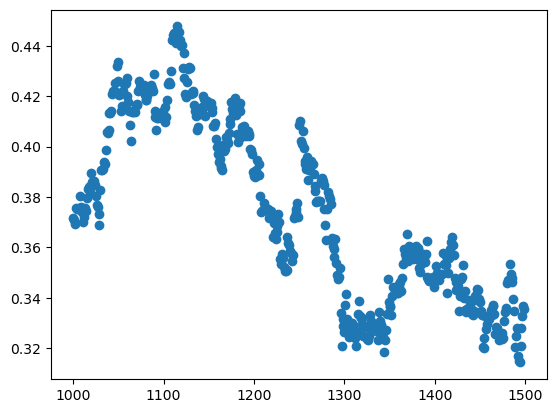

In [343]:
chosen = [0, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49]
result = []
for i in range(1000, 1500):
    if i % 250 == 0:
        seq, length, trimmed = backward_selection(data.iloc[:i-250])
        chosen = list(trimmed[seq.index(max(seq))])
    result.append(data.iloc[i-250:i][chosen].sum(axis=1).pct_change().dropna().autocorr(lag=1))
plt.scatter(range(1000, 1500), result)

In [344]:
data.sum(axis=1)

0       2380.860352
1       2384.890381
2       2384.730225
3       2386.370117
4       2390.510010
           ...     
1495    2310.220215
1496    2311.150391
1497    2316.690186
1498    2321.049805
1499    2320.329834
Length: 1500, dtype: float32

In [345]:
# Dual annealing + differential evolution for testing
def compute_weights(df, init):
    from scipy.optimize import differential_evolution

    def test(weights):
        return -abs((df * weights).sum(1).pct_change().autocorr()) - np.std(np.abs(weights)) / 5

    def cb(x, f):
        print(test(x))

    if init is None:
        init = np.ones(50)

    return differential_evolution(test, bounds=[(0,1)] * 50, callback=cb, x0=init, maxiter=1000).x



In [346]:
def compute_weights_dual(df, init):
    from scipy.optimize import dual_annealing

    def test(weights):
        return -abs((df * weights).sum(1).diff().autocorr()) - np.sum(np.abs(weights)) / 100

    def cb(x, f, context):
        print(x, f, context)

    
    if init is None:
        init = np.ones(50)

    result = dual_annealing(test, [(-1,1)] * 50, callback=cb, maxiter=2000, no_local_search=True, x0=init)
    return result.x

In [ ]:
result = compute_weights(data.iloc[:1000], None)

-0.48697110196814913
-0.4943534532131155
-0.523899415700323
-0.523899415700323
-0.5250520289013267
-0.536996233484766
-0.536996233484766
-0.5463013653785975
-0.5467104549138868
-0.5467104549138868
-0.5487075608337174
-0.5515469925497914
-0.5550706946041956
-0.5550706946041956
-0.5576176155696648
-0.5576176155696648
-0.5576176155696648
-0.5632183575723608
-0.5632183575723608
-0.5669063534358474
-0.5670167468432983
-0.5670167468432983
-0.5677472588378171
-0.5729440132296757
-0.5776177912945543
-0.5776177912945543
-0.5776177912945543
-0.588155123573462
-0.588155123573462
-0.588155123573462
-0.588155123573462
-0.588155123573462
-0.588155123573462
-0.588155123573462
-0.588155123573462
-0.588155123573462
-0.5904706669543671
-0.5904706669543671
-0.5913206052584189
-0.5913206052584189
-0.5913206052584189
-0.5913206052584189
-0.5939562608778858
-0.5939562608778858
-0.5940398626770577
-0.5940398626770577
-0.5940398626770577
-0.5940398626770577
-0.5940398626770577
-0.5948969390792812


In [348]:
result_evol = [-9.99925371e-01, -2.68425677e-02, -1.17435236e-02, -9.80035456e-04,
       -2.87847866e-01, -9.98553622e-01, -1.55903512e-03, -2.25884277e-01,
       -2.90641281e-01, -1.09641324e-01, -2.60593308e-01, -1.95272802e-01,
       -4.84680823e-01, -9.99806776e-01, -1.78517533e-01, -2.25449529e-01,
       -8.01128697e-01, -9.97869278e-01, -4.59408234e-03, -9.99924677e-01,
       -9.97999150e-01, -9.98676284e-01, -2.40232548e-01, -2.75923076e-01,
       -6.06011611e-01, -2.85172169e-01, -8.89712522e-04, -9.98086931e-01,
       -7.46842409e-02, -3.11112645e-01,  7.64032022e-04, -2.17810259e-01,
       -4.48163719e-01, -9.99685881e-01, -5.66833422e-01, -6.77963156e-01,
       -4.60064461e-01, -3.67033909e-01, -9.99220016e-01, -9.99202993e-01,
       -4.60275365e-03, -4.03132792e-01, -2.59480269e-01, -3.99291175e-04,
       -5.12487731e-01, -9.98588735e-01, -3.65608970e-01, -9.99235975e-01,
       -3.93944159e-01, -9.89829421e-01]

weighted = data.iloc[1000:] * result_evol
weighted.sum(axis=1).pct_change().dropna().autocorr()

0.4621961825518281

In [349]:
result_dual = compute_weights_dual(data.iloc[:1000], None)

KeyboardInterrupt: 

In [ ]:
print(result_dual)
weighted = data.iloc[1000:] * result_dual
weighted.sum(axis=1).pct_change().dropna().autocorr()

[-0.99966671 -0.99714606 -0.34388751  0.99896263 -0.99916755 -0.99930186
  0.99977151 -0.99851554 -0.99889932 -0.71964477 -0.99947925 -0.89244364
 -0.99983189 -0.9991207  -0.79935632 -0.99996189 -0.99920778 -0.99837782
 -0.99096548 -0.9997145  -0.99947538 -0.99894845 -0.69510397 -0.92293044
 -0.9998164  -0.99786356 -0.99880525 -0.99926355 -0.52714176 -0.99758405
  0.99897271 -0.99375795 -0.99954443 -0.9986731  -0.99970521 -0.99963454
 -0.99654271 -0.99946127 -0.99981081 -0.99941392 -0.88959212 -0.99870393
 -0.99823959 -0.98804555 -0.99962645 -0.99987621 -0.99876836 -0.99861053
 -0.99937592 -0.99746551]


0.36857327918428795

In [ ]:
print(list(result_dual))

[-0.6781593858425303, 0.9430517834260694, -0.7896076775679903, -0.7643941791524425, -0.05710959756187739, 0.22835386509613498, 0.7026905237523606, -0.8415855509171957, -0.7464352670585912, -0.7397549537082928, -0.942004075722255, -0.8312381477335697, -0.6981818290605992, -0.18487485033802376, -0.9355651861562664, -0.3956503471208217, 0.45789037578114034, -0.36591679788957165, 0.0584892449523613, 0.7689030404364248, 0.5149409837720573, 0.06086832475390924, 0.3869632365814697, 0.8360260847149923, 0.717194121181921, 0.7333792078223245, -0.456551105487764, -0.5444673297040197, 0.9496779902644898, 0.8351932843171905, -0.462683769279141, 0.19227795356134703, 0.45085048810897366, -0.7465312503178101, -0.5574164215677673, 0.722661498233419, 0.4967816433257197, -0.028990576168116178, 0.9708940024234392, -0.008370505037676779, -0.6503025922627179, -0.04178900576233646, 0.6626999364369706, 0.5598532367923497, 0.5465632049190567, -0.33176725462544754, 0.13596553083725027, 0.05697456363202802, -0.7

In [ ]:
data.iloc[1000:] * [-0.6781593858425303, 0.9430517834260694, -0.7896076775679903, -0.7643941791524425, -0.05710959756187739, 0.22835386509613498, 0.7026905237523606, -0.8415855509171957, -0.7464352670585912, -0.7397549537082928, -0.942004075722255, -0.8312381477335697, -0.6981818290605992, -0.18487485033802376, -0.9355651861562664, -0.3956503471208217, 0.45789037578114034, -0.36591679788957165, 0.0584892449523613, 0.7689030404364248, 0.5149409837720573, 0.06086832475390924, 0.3869632365814697, 0.8360260847149923, 0.717194121181921, 0.7333792078223245, -0.456551105487764, -0.5444673297040197, 0.9496779902644898, 0.8351932843171905, -0.462683769279141, 0.19227795356134703, 0.45085048810897366, -0.7465312503178101, -0.5574164215677673, 0.722661498233419, 0.4967816433257197, -0.028990576168116178, 0.9708940024234392, -0.008370505037676779, -0.6503025922627179, -0.04178900576233646, 0.6626999364369706, 0.5598532367923497, 0.5465632049190567, -0.33176725462544754, 0.13596553083725027, 0.05697456363202802, -0.7776056801298448, -0.10924744250098417]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1000,-22.013053,47.831588,-39.069788,-25.523121,-2.376901,5.644907,11.636555,-40.067889,-23.355960,-38.985087,...,-50.437467,-1.516523,18.767662,15.715080,37.581687,-8.967669,9.185831,0.901907,-65.785439,-3.046911
1001,-21.958802,47.812726,-39.188230,-25.507833,-2.381470,5.654042,11.460882,-40.177296,-23.027528,-39.362360,...,-50.359434,-1.515269,19.152028,15.855043,37.822172,-8.897998,9.339473,0.899059,-66.003168,-3.045819
1002,-21.877421,48.114502,-40.467393,-25.492545,-2.352915,5.583252,11.474936,-39.478778,-22.923026,-38.630005,...,-49.891216,-1.479749,18.959846,16.241343,37.581687,-8.878092,9.230700,0.892222,-65.808767,-3.041449
1003,-21.911331,48.340833,-40.317369,-25.912964,-2.335783,5.530730,11.278182,-38.797093,-22.266164,-38.141766,...,-50.235875,-1.460108,18.973099,15.922226,37.494235,-8.798468,9.202147,0.884245,-65.489951,-3.034894
1004,-21.768915,48.567167,-40.246304,-25.958826,-2.340922,5.548999,11.341425,-38.704521,-22.318414,-38.297114,...,-50.255384,-1.452586,18.807424,15.860642,37.237350,-8.761973,9.096094,0.879118,-65.497729,-3.049096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-25.227530,44.549768,-37.190520,-19.614355,-2.367193,5.078590,16.667819,-33.932729,-11.293566,-31.180672,...,-63.983272,-2.183058,13.015426,14.858505,42.637397,-6.910712,10.669215,0.885954,-52.371741,-2.816399
1496,-25.010519,44.238559,-37.506365,-19.927756,-2.366622,5.046621,16.646739,-33.739165,-11.069635,-30.921757,...,-63.339473,-2.212310,13.214237,14.724140,42.407837,-6.960477,10.790225,0.884245,-52.325087,-2.845896
1497,-25.085117,44.606349,-37.640597,-20.027128,-2.380328,5.058038,16.527281,-33.924315,-10.950205,-30.736818,...,-63.027326,-2.228190,13.200983,14.841709,42.544478,-6.930618,10.696408,0.875699,-52.107358,-2.864468
1498,-24.949484,44.540335,-37.348443,-19.667862,-2.378044,5.053471,16.246205,-34.143126,-10.853169,-31.299033,...,-63.196406,-2.260785,13.187728,14.864103,42.085367,-6.897442,10.696408,0.880257,-52.332865,-2.888502


In [ ]:
weighted

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1000,-22.013053,47.831588,-39.069788,-25.523121,-2.376901,5.644907,11.636555,-40.067889,-23.355960,-38.985087,...,-50.437467,-1.516523,18.767662,15.715080,37.581687,-8.967669,9.185831,0.901907,-65.785439,-3.046911
1001,-21.958802,47.812726,-39.188230,-25.507833,-2.381470,5.654042,11.460882,-40.177296,-23.027528,-39.362360,...,-50.359434,-1.515269,19.152028,15.855043,37.822172,-8.897998,9.339473,0.899059,-66.003168,-3.045819
1002,-21.877421,48.114502,-40.467393,-25.492545,-2.352915,5.583252,11.474936,-39.478778,-22.923026,-38.630005,...,-49.891216,-1.479749,18.959846,16.241343,37.581687,-8.878092,9.230700,0.892222,-65.808767,-3.041449
1003,-21.911331,48.340833,-40.317369,-25.912964,-2.335783,5.530730,11.278182,-38.797093,-22.266164,-38.141766,...,-50.235875,-1.460108,18.973099,15.922226,37.494235,-8.798468,9.202147,0.884245,-65.489951,-3.034894
1004,-21.768915,48.567167,-40.246304,-25.958826,-2.340922,5.548999,11.341425,-38.704521,-22.318414,-38.297114,...,-50.255384,-1.452586,18.807424,15.860642,37.237350,-8.761973,9.096094,0.879118,-65.497729,-3.049096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-25.227530,44.549768,-37.190520,-19.614355,-2.367193,5.078590,16.667819,-33.932729,-11.293566,-31.180672,...,-63.983272,-2.183058,13.015426,14.858505,42.637397,-6.910712,10.669215,0.885954,-52.371741,-2.816399
1496,-25.010519,44.238559,-37.506365,-19.927756,-2.366622,5.046621,16.646739,-33.739165,-11.069635,-30.921757,...,-63.339473,-2.212310,13.214237,14.724140,42.407837,-6.960477,10.790225,0.884245,-52.325087,-2.845896
1497,-25.085117,44.606349,-37.640597,-20.027128,-2.380328,5.058038,16.527281,-33.924315,-10.950205,-30.736818,...,-63.027326,-2.228190,13.200983,14.841709,42.544478,-6.930618,10.696408,0.875699,-52.107358,-2.864468
1498,-24.949484,44.540335,-37.348443,-19.667862,-2.378044,5.053471,16.246205,-34.143126,-10.853169,-31.299033,...,-63.196406,-2.260785,13.187728,14.864103,42.085367,-6.897442,10.696408,0.880257,-52.332865,-2.888502


In [ ]:
38.250000 * -0.67815939

-25.939596667500002

In [ ]:
data.iloc[1000:]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1000,32.459999,50.720001,49.480000,33.389999,41.619999,24.719999,16.559999,47.610001,31.290001,52.700001,...,77.559998,36.290001,28.320000,28.070000,68.760002,27.030001,67.559998,15.83,84.599998,27.889999
1001,32.380001,50.700001,49.630001,33.369999,41.700001,24.760000,16.309999,47.740002,30.850000,53.209999,...,77.440002,36.259998,28.900000,28.320000,69.199997,26.820000,68.690002,15.78,84.879997,27.879999
1002,32.259998,51.020000,51.250000,33.349998,41.200001,24.450001,16.330000,46.910000,30.709999,52.220001,...,76.720001,35.410000,28.610001,29.010000,68.760002,26.760000,67.889999,15.66,84.629997,27.840000
1003,32.310001,51.259998,51.060001,33.900002,40.900002,24.219999,16.049999,46.099998,29.830000,51.560001,...,77.250000,34.939999,28.629999,28.440001,68.599998,26.520000,67.680000,15.52,84.220001,27.780001
1004,32.099998,51.500000,50.970001,33.959999,40.990002,24.299999,16.139999,45.990002,29.900000,51.770000,...,77.279999,34.759998,28.379999,28.330000,68.129997,26.410000,66.900002,15.43,84.230003,27.910000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.200001,47.240002,47.099998,25.660000,41.450001,22.240000,23.719999,40.320000,15.130000,42.150002,...,98.389999,52.240002,19.639999,26.540001,78.010002,20.830000,78.470001,15.55,67.349998,25.780001
1496,36.880001,46.910000,47.500000,26.070000,41.439999,22.100000,23.690001,40.090000,14.830000,41.799999,...,97.400002,52.939999,19.940001,26.299999,77.589996,20.980000,79.360001,15.52,67.290001,26.049999
1497,36.990002,47.299999,47.669998,26.200001,41.680000,22.150000,23.520000,40.310001,14.670000,41.549999,...,96.919998,53.320000,19.920000,26.510000,77.839996,20.889999,78.669998,15.37,67.010002,26.219999
1498,36.790001,47.230000,47.299999,25.730000,41.639999,22.129999,23.120001,40.570000,14.540000,42.310001,...,97.180000,54.099998,19.900000,26.549999,77.000000,20.790001,78.669998,15.45,67.300003,26.440001
